In [1]:
import gym_simpletetris
import gym

In [2]:
from stable_baselines3 import DQN
from stable_baselines3.common.monitor import Monitor

In [3]:
import numpy as np

In [7]:
num_steps = 500000

In [5]:
from stable_baselines3.common.callbacks import BaseCallback

In [6]:
class RewardLoggerCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(RewardLoggerCallback, self).__init__(verbose)
        self.episode_rewards = []

    def _on_step(self) -> bool:
        done = self.locals['dones']
        reward = self.locals['rewards']

        if done:
            episode_reward = np.sum(reward)
            self.episode_rewards.append(episode_reward)
            if self.verbose > 0:
                print(f"Episode Reward: {episode_reward}")

        return True

    def _on_training_end(self) -> None:
        np.save("episode_rewards.npy", self.episode_rewards)  # Save the rewards to a file

# partial credits to GPT + stable-baseline-3 documentation

Training the model:

In [8]:
# Tetris DQN
env = gym.make('SimpleTetris-v0',
               height=20,                       # Height of Tetris grid
               width=10,                        # Width of Tetris grid
               obs_type='ram',                  # ram | grayscale | rgb
               extend_dims=False,               # Extend ram or grayscale dimensions
               render_mode='rgb_array',         # Unused parameter
               reward_step=True,               # See reward table
               penalise_height=False,           # See reward table
               penalise_height_increase=True,  # See reward table
               advanced_clears=True,           # See reward table
               high_scoring=True,              # See reward table
               penalise_holes=False,            # See reward table
               penalise_holes_increase=True,   # See reward table
               lock_delay=0,                    # Lock delay as number of steps
               step_reset=False                 # Reset lock delay on step downwards
               )
callback = RewardLoggerCallback(verbose=0)
model = DQN('MlpPolicy', env, verbose=0)
model.learn(total_timesteps=num_steps, callback=callback)
model.save(f'tetris')
del model
env.close()

c:\Users\erics\anaconda3\Lib\site-packages\gym\envs\registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'render_fps']
  logger.warn(
c:\Users\erics\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (10, 20)
  logger.warn(
c:\Users\erics\anaconda3\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
c:\Users\erics\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:174

Loading and showing the rewards torwards the end of the model's convergence:

In [18]:
env = gym.make('SimpleTetris-v0',
               height=20,                       # Height of Tetris grid
               width=10,                        # Width of Tetris grid
               obs_type='ram',                  # ram | grayscale | rgb
               extend_dims=False,               # Extend ram or grayscale dimensions
               render_mode='rgb_array',         # Unused parameter
               reward_step=True,               # See reward table
               penalise_height=False,           # See reward table
               penalise_height_increase=True,  # See reward table
               advanced_clears=True,           # See reward table
               high_scoring=True,              # See reward table
               penalise_holes=False,            # See reward table
               penalise_holes_increase=True,   # See reward table
               lock_delay=0,                    # Lock delay as number of steps
               step_reset=False                 # Reset lock delay on step downwards
               )

c:\Users\erics\anaconda3\Lib\site-packages\gym\envs\registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'render_fps']
  logger.warn(
c:\Users\erics\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (10, 20)
  logger.warn(


In [19]:
model = DQN.load("tetris.zip", env=env)

c:\Users\erics\anaconda3\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [20]:
from tqdm import tqdm

In [21]:
# Evaluate the agent
vec_env = model.get_env()
obs = vec_env.reset()
get_rewards = []
num_episodes = 1000
steps = 0
for i in tqdm(range(num_episodes)):
    done = False
    curr_rewards = 0
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, rewards, dones, info = vec_env.step(action)
        done = dones
        curr_rewards += rewards

    get_rewards.append(curr_rewards)

c:\Users\erics\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
c:\Users\erics\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
c:\Users\erics\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
  0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\erics\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:219: DeprecationWarnin

In [22]:
import matplotlib.pyplot as plt

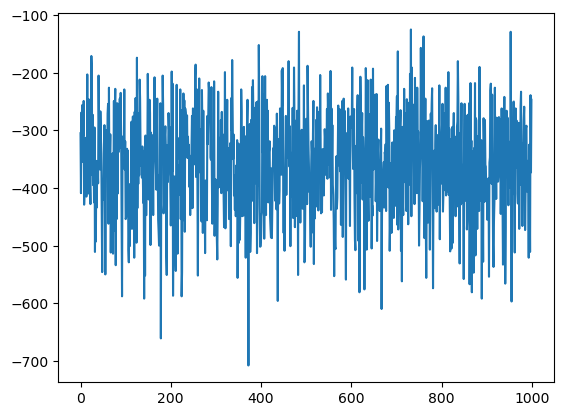

In [23]:
plt.plot(range(len(get_rewards)), get_rewards)

In [ ]:
import os

In [ ]:
model = DQN.load("tetris_3000000.zip", env=env)

In [ ]:
import os
import imageio
import numpy as np
from PIL import Image
import PIL.ImageDraw as ImageDraw
import matplotlib.pyplot as plt  

In [ ]:
env = gym.make('SimpleTetris-v0',
               height=20,                       # Height of Tetris grid
               width=10,                        # Width of Tetris grid
               obs_type='ram',                  # ram | grayscale | rgb
               extend_dims=False,               # Extend ram or grayscale dimensions
               render_mode='rgb_array',         # Unused parameter
               reward_step=True,               # See reward table
               penalise_height=False,           # See reward table
               penalise_height_increase=True,  # See reward table
               advanced_clears=True,           # See reward table
               high_scoring=False,              # See reward table
               penalise_holes=False,            # See reward table
               penalise_holes_increase=True,   # See reward table
               lock_delay=0,                    # Lock delay as number of steps
               step_reset=False                 # Reset lock delay on step downwards
               )

In [ ]:
model = DQN.load("tetris_3000000.zip", env=env)